In [8]:
from os import listdir
from os.path import join, isfile, isdir
import pandas as pd

from ImageClassification_marlog_acc import ImageClassification

from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam

# Warnings about data rate limits
# IOPub data rate exceeded.
# https://github.com/jupyter/notebook/issues/2287
# --NotebookApp.iopub_data_rate_limit (increase limit)
# jupyter notebook --generate-config

In [9]:
species_home_directory = '/home/marlog/Rprojects/WildflowersAll04May18/'
training_flag = 'Training'
validation_flag = 'Validation'
# List all the directories, these become the classes
species_directories = [dir for dir in listdir(species_home_directory) if isdir(join(species_home_directory, dir))]

# Create the base dataframe
wildflower_df = pd.DataFrame()
validation_df = pd.DataFrame()

for current_species in species_directories:
    # Get the training images
    images = [f for f in listdir(join(species_home_directory, current_species, training_flag)) 
             if isfile(join(species_home_directory, current_species, training_flag, f))]
    # Only for cpu testing
    images = images[0:5000]
    species_class = [current_species] * len(images)
    species_directory = [join(species_home_directory, current_species, training_flag)] * len(images)
    dict_rep = {'image_id': images, 'directory': species_directory, 'class': species_class}
    df_rep = pd.DataFrame(dict_rep)
    wildflower_df = wildflower_df.append(df_rep, ignore_index=True) 

for current_species in species_directories:
    # Get the validation images
    images = [f for f in listdir(join(species_home_directory, current_species, validation_flag)) 
             if isfile(join(species_home_directory, current_species, validation_flag, f))]
    # Only for cpu testing
    images = images[0:5000]    
    species_class = [current_species] * len(images)
    species_directory = [join(species_home_directory, current_species, validation_flag)] * len(images)
    dict_rep = {'image_id': images, 'directory': species_directory, 'class': species_class}
    df_rep = pd.DataFrame(dict_rep)
    validation_df = validation_df.append(df_rep, ignore_index=True) 

print("Length of train/test data: {}, length of validation data: {}".format(wildflower_df.shape[0], validation_df.shape[0]))

Length of train/test data: 23756, length of validation data: 5927


In [10]:
wildflower_classifier = ImageClassification('id1',
                                           wildflower_df, 
                                           validation_df,
                                           '/home/marlog/Rprojects/Wildflowers04May18',  
                                           32,
                                           0.25,
                                           1,
                                           True,
                                           True)

Loading BokehJS ...

In [11]:
inception_resnet_top_model_basic = Sequential()
inception_resnet_top_model_basic.add(Dense(wildflower_classifier.class_counts.shape[0], activation='softmax', input_shape=(wildflower_classifier.model_dense_pooled_dimensions.get('inception-resnet'))))
inception_resnet_top_model_basic.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_dict = {'BasicV3Res': [inception_resnet_top_model_basic, 'inception-resnet', 500]}

wildflower_classifier.train_provided_top_models(model_dict)

Beginning to create the train bottleneck features for model: inception-resnet
Found 17818 images belonging to 17 classes.
Beginning to create the test bottleneck features for model: inception-resnet
Found 5938 images belonging to 17 classes.
Beginning to train model: BasicV3Res for 500 epochs.
Epoch 1/500
557/557 [==============================] - 4s 6ms/step - loss: 1.6956 - acc: 0.5653 - val_loss: 1.0688 - val_acc: 0.6598
Epoch 2/500
557/557 [==============================] - 3s 5ms/step - loss: 1.1883 - acc: 0.6945 - val_loss: 0.9449 - val_acc: 0.6952
Epoch 3/500
557/557 [==============================] - 3s 5ms/step - loss: 1.0491 - acc: 0.7265 - val_loss: 0.8777 - val_acc: 0.7189
Epoch 4/500
557/557 [==============================] - 3s 5ms/step - loss: 0.9658 - acc: 0.7462 - val_loss: 0.8408 - val_acc: 0.7309
Epoch 5/500
557/557 [==============================] - 3s 5ms/step - loss: 0.9076 - acc: 0.7602 - val_loss: 0.8156 - val_acc: 0.7412
Epoch 6/500
557/557 [===================

557/557 [==============================] - 3s 5ms/step - loss: 0.3590 - acc: 0.9136 - val_loss: 0.6691 - val_acc: 0.8198
Epoch 61/500
557/557 [==============================] - 3s 5ms/step - loss: 0.3556 - acc: 0.9149 - val_loss: 0.6732 - val_acc: 0.8188
Epoch 62/500
557/557 [==============================] - 3s 5ms/step - loss: 0.3528 - acc: 0.9157 - val_loss: 0.6709 - val_acc: 0.8193
Epoch 63/500
557/557 [==============================] - 3s 5ms/step - loss: 0.3496 - acc: 0.9167 - val_loss: 0.6727 - val_acc: 0.8188
Epoch 64/500
557/557 [==============================] - 3s 5ms/step - loss: 0.3462 - acc: 0.9176 - val_loss: 0.6744 - val_acc: 0.8190
Epoch 65/500
557/557 [==============================] - 3s 5ms/step - loss: 0.3428 - acc: 0.9183 - val_loss: 0.6776 - val_acc: 0.8185
Epoch 66/500
557/557 [==============================] - 3s 5ms/step - loss: 0.3399 - acc: 0.9189 - val_loss: 0.6745 - val_acc: 0.8191
Epoch 67/500
557/557 [==============================] - 3s 5ms/step - loss:

557/557 [==============================] - 3s 5ms/step - loss: 0.2226 - acc: 0.9531 - val_loss: 0.7506 - val_acc: 0.8217
Epoch 122/500
557/557 [==============================] - 3s 6ms/step - loss: 0.2214 - acc: 0.9536 - val_loss: 0.7490 - val_acc: 0.8232
Epoch 123/500
557/557 [==============================] - 3s 5ms/step - loss: 0.2198 - acc: 0.9540 - val_loss: 0.7480 - val_acc: 0.8230
Epoch 124/500
557/557 [==============================] - 3s 5ms/step - loss: 0.2181 - acc: 0.9542 - val_loss: 0.7449 - val_acc: 0.8238
Epoch 125/500
557/557 [==============================] - 3s 6ms/step - loss: 0.2167 - acc: 0.9547 - val_loss: 0.7461 - val_acc: 0.8223
Epoch 126/500
557/557 [==============================] - 3s 5ms/step - loss: 0.2154 - acc: 0.9549 - val_loss: 0.7478 - val_acc: 0.8210
Epoch 127/500
557/557 [==============================] - 3s 5ms/step - loss: 0.2140 - acc: 0.9552 - val_loss: 0.7495 - val_acc: 0.8212
Epoch 128/500
557/557 [==============================] - 3s 5ms/step 

Epoch 182/500
557/557 [==============================] - 3s 5ms/step - loss: 0.1514 - acc: 0.9745 - val_loss: 0.8670 - val_acc: 0.8178
Epoch 183/500
557/557 [==============================] - 3s 5ms/step - loss: 0.1504 - acc: 0.9749 - val_loss: 0.8776 - val_acc: 0.8159
Epoch 184/500
557/557 [==============================] - 3s 5ms/step - loss: 0.1496 - acc: 0.9751 - val_loss: 0.8750 - val_acc: 0.8174
Epoch 185/500
557/557 [==============================] - 3s 5ms/step - loss: 0.1484 - acc: 0.9755 - val_loss: 0.8791 - val_acc: 0.8154
Epoch 186/500
557/557 [==============================] - 3s 6ms/step - loss: 0.1476 - acc: 0.9759 - val_loss: 0.8780 - val_acc: 0.8154
Epoch 187/500
557/557 [==============================] - 3s 6ms/step - loss: 0.1470 - acc: 0.9760 - val_loss: 0.8777 - val_acc: 0.8171
Epoch 188/500
557/557 [==============================] - 3s 5ms/step - loss: 0.1462 - acc: 0.9761 - val_loss: 0.8753 - val_acc: 0.8180
Epoch 189/500
557/557 [==============================] 

557/557 [==============================] - 3s 5ms/step - loss: 0.1075 - acc: 0.9859 - val_loss: 0.8977 - val_acc: 0.8201
Epoch 243/500
557/557 [==============================] - 3s 5ms/step - loss: 0.1070 - acc: 0.9860 - val_loss: 0.8997 - val_acc: 0.8203
Epoch 244/500
557/557 [==============================] - 3s 5ms/step - loss: 0.1064 - acc: 0.9862 - val_loss: 0.9066 - val_acc: 0.8210
Epoch 245/500
557/557 [==============================] - 3s 5ms/step - loss: 0.1058 - acc: 0.9862 - val_loss: 0.9098 - val_acc: 0.8206
Epoch 246/500
557/557 [==============================] - 3s 5ms/step - loss: 0.1052 - acc: 0.9864 - val_loss: 0.9174 - val_acc: 0.8190
Epoch 247/500
557/557 [==============================] - 3s 5ms/step - loss: 0.1047 - acc: 0.9865 - val_loss: 0.9177 - val_acc: 0.8186
Epoch 248/500
557/557 [==============================] - 3s 5ms/step - loss: 0.1039 - acc: 0.9867 - val_loss: 0.9283 - val_acc: 0.8171
Epoch 249/500
557/557 [==============================] - 3s 6ms/step 

Epoch 303/500
557/557 [==============================] - 3s 5ms/step - loss: 0.0775 - acc: 0.9927 - val_loss: 0.9789 - val_acc: 0.8210
Epoch 304/500
557/557 [==============================] - 3s 5ms/step - loss: 0.0773 - acc: 0.9927 - val_loss: 0.9742 - val_acc: 0.8217
Epoch 305/500
557/557 [==============================] - 3s 5ms/step - loss: 0.0769 - acc: 0.9927 - val_loss: 0.9802 - val_acc: 0.8203
Epoch 306/500
557/557 [==============================] - 3s 5ms/step - loss: 0.0764 - acc: 0.9928 - val_loss: 0.9770 - val_acc: 0.8193
Epoch 307/500
557/557 [==============================] - 3s 5ms/step - loss: 0.0759 - acc: 0.9929 - val_loss: 0.9826 - val_acc: 0.8198
Epoch 308/500
557/557 [==============================] - 3s 5ms/step - loss: 0.0755 - acc: 0.9930 - val_loss: 0.9855 - val_acc: 0.8185
Epoch 309/500
557/557 [==============================] - 3s 5ms/step - loss: 0.0752 - acc: 0.9931 - val_loss: 0.9870 - val_acc: 0.8169
Epoch 310/500
557/557 [==============================] 

557/557 [==============================] - 3s 5ms/step - loss: 0.0570 - acc: 0.9959 - val_loss: 1.0695 - val_acc: 0.8104
Epoch 364/500
557/557 [==============================] - 3s 5ms/step - loss: 0.0567 - acc: 0.9959 - val_loss: 1.0695 - val_acc: 0.8099
Epoch 365/500
557/557 [==============================] - 3s 6ms/step - loss: 0.0564 - acc: 0.9959 - val_loss: 1.0713 - val_acc: 0.8090
Epoch 366/500
557/557 [==============================] - 3s 6ms/step - loss: 0.0561 - acc: 0.9959 - val_loss: 1.0588 - val_acc: 0.8107
Epoch 367/500
557/557 [==============================] - 3s 5ms/step - loss: 0.0559 - acc: 0.9959 - val_loss: 1.0656 - val_acc: 0.8092
Epoch 368/500
557/557 [==============================] - 3s 5ms/step - loss: 0.0556 - acc: 0.9959 - val_loss: 1.0644 - val_acc: 0.8094
Epoch 369/500
557/557 [==============================] - 3s 5ms/step - loss: 0.0553 - acc: 0.9959 - val_loss: 1.0622 - val_acc: 0.8095
Epoch 370/500
557/557 [==============================] - 3s 5ms/step 

Epoch 424/500
557/557 [==============================] - 3s 5ms/step - loss: 0.0420 - acc: 0.9977 - val_loss: 1.1311 - val_acc: 0.8142
Epoch 425/500
557/557 [==============================] - 3s 5ms/step - loss: 0.0418 - acc: 0.9977 - val_loss: 1.1333 - val_acc: 0.8137
Epoch 426/500
557/557 [==============================] - 3s 5ms/step - loss: 0.0416 - acc: 0.9977 - val_loss: 1.1386 - val_acc: 0.8131
Epoch 427/500
557/557 [==============================] - 3s 5ms/step - loss: 0.0414 - acc: 0.9977 - val_loss: 1.1392 - val_acc: 0.8129
Epoch 428/500
557/557 [==============================] - 3s 5ms/step - loss: 0.0411 - acc: 0.9977 - val_loss: 1.1369 - val_acc: 0.8136
Epoch 429/500
557/557 [==============================] - 3s 5ms/step - loss: 0.0410 - acc: 0.9977 - val_loss: 1.1449 - val_acc: 0.8134
Epoch 430/500
557/557 [==============================] - 3s 5ms/step - loss: 0.0408 - acc: 0.9978 - val_loss: 1.1472 - val_acc: 0.8119
Epoch 431/500
557/557 [==============================] 

557/557 [==============================] - 3s 6ms/step - loss: 0.0313 - acc: 0.9989 - val_loss: 1.1928 - val_acc: 0.8158
Epoch 485/500
557/557 [==============================] - 3s 5ms/step - loss: 0.0312 - acc: 0.9990 - val_loss: 1.1969 - val_acc: 0.8158
Epoch 486/500
557/557 [==============================] - 3s 5ms/step - loss: 0.0310 - acc: 0.9990 - val_loss: 1.1997 - val_acc: 0.8164
Epoch 487/500
557/557 [==============================] - 3s 5ms/step - loss: 0.0308 - acc: 0.9990 - val_loss: 1.2020 - val_acc: 0.8158
Epoch 488/500
557/557 [==============================] - 3s 5ms/step - loss: 0.0307 - acc: 0.9990 - val_loss: 1.2108 - val_acc: 0.8156
Epoch 489/500
557/557 [==============================] - 3s 5ms/step - loss: 0.0306 - acc: 0.9990 - val_loss: 1.2180 - val_acc: 0.8154
Epoch 490/500
557/557 [==============================] - 3s 5ms/step - loss: 0.0304 - acc: 0.9990 - val_loss: 1.2295 - val_acc: 0.8117
Epoch 491/500
557/557 [==============================] - 3s 5ms/step 

In [12]:
wildflower_classifier.eda_summary()


/home/marlog/miniconda2/envs/keras-tf-gpu-marlog2/lib/python3.5/site-packages/bokeh/core/json_encoder.py:80: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(type(obj), np.float):


In [13]:
wildflower_classifier.evaluate_top_model_training()

In [14]:
wildflower_classifier.evaluate_model_prediction("accuracy")

Creating predictions using BasicV3Res for the validation data.
Classification Accuracy for BasicV3Res is: 0.8267251560654632


In [15]:
wildflower_classifier.evaluate_model_prediction("confusion")

                  Model               Class  normalised
0         Alsike Clover       Alsike Clover   69.747899
18   Birds Foot Trefoil  Birds Foot Trefoil   87.719298
36       Black Knapweed      Black Knapweed   90.476190
54         Black Medick        Black Medick   85.714286
72         Common Vetch        Common Vetch   83.919598
90       Crimson Clover      Crimson Clover   85.873606
108             Lucerne             Lucerne   73.858921
126         Musk Mallow         Musk Mallow   90.476190
144         Oxeye Daisy         Oxeye Daisy   96.992481
162            Phacelia            Phacelia   70.927318
180         Red Campion         Red Campion   81.453634
198          Red Clover          Red Clover   79.197995
216            Sainfoin            Sainfoin   76.691729
234       White Campion       White Campion   89.473684
252        White Clover        White Clover   73.433584
270         Wild Carrot         Wild Carrot   80.701754
288              Yarrow              Yarrow   76

In [16]:
wildflower_classifier.evaluate_model_prediction("heatmaps")


            The best performing images are calculated as those that have the correct predicted class, ordered
            by those with the smallest distance between the prediction for the correct class and a perfect prediction.

            The worst performing images are calculated as those that have the wrong predicted class, ordered
            by those with the largest distance between the prediction for the correct class and a perfect prediction.
            TODO: Maybe this should instead be how many classes are between the first prediction and the actual
            class prediction position?:

                Best performing images for model: BasicV3Res


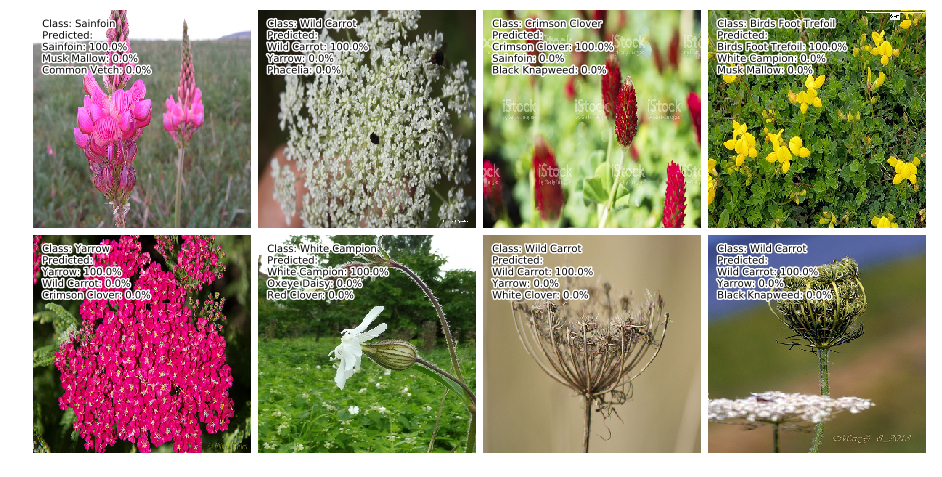


                Worst performing images for model: BasicV3Res


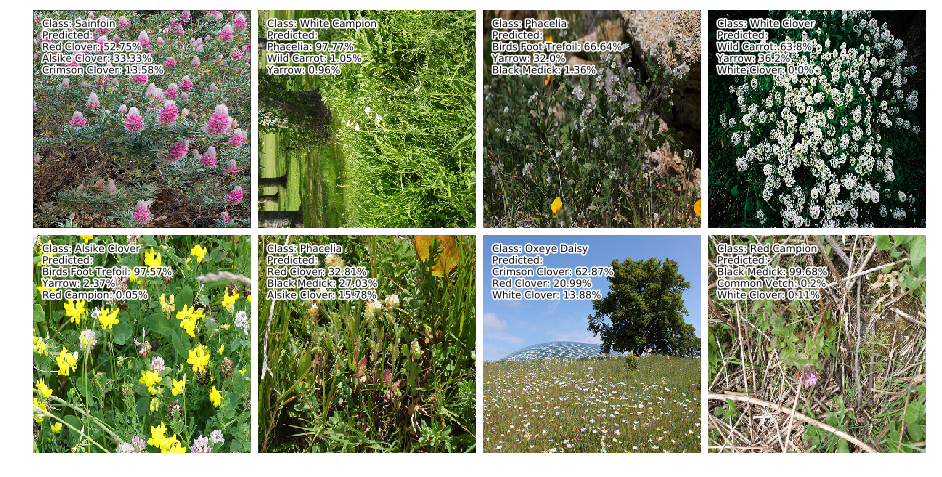

In [17]:
wildflower_classifier.evaluate_model_prediction("extremes-examples")

In [18]:
wildflower_classifier.evaluate_model_prediction("bar-f1score")

In [19]:
wildflower_classifier.evaluate_model_prediction("line-f1score")